# An investigation into Feature Films 
<font size="2">Date: 15.06.2021</font> <br>
<font size="2">By: Mohamed Gutale</font>
### Background
By now we have all come to understand that one of the industries were technology has effected most is the film /entertainment industry.  Streaming services such as Netlfix, Prime and others have taken a massive chunk of this market and as a result the number of people going to see movies in cinemas have dwindled thus feature movies have dropped since. if this hasnt already been bad, the pandemic and delays in big production films have accelerated this even further. According to Independant Newspaper <a href = 'https://www.independent.co.uk/arts-entertainment/films/news/cinema-closed-uk-cineworld-odeon-picturehouse-b884463.html' >article<a/> published on the 8th October 2020, the biggest names in the cinema industry have closed more than 150 cinemas in the UK including CineWorld, Picturehouse and Odean. I therefore have chosen the Feature <a href = 'https://en.wikipedia.org/wiki/Feature_film'>Films<a/> industry which has long been considered as a source of entertainment for many years and generations. When i say Feature Film, i am referring to Academy of Motion Picture of Art and Science in American Film Institute and British Film Institute produced in english. According to British Film Industry - BFI - the film industry contributed <a href= 'https://www2.bfi.org.uk/sites/bfi.org.uk/files/downloads/bfi-uk-film-economy-2019-01-30.pdf' >£14 billion<a/> to the GDP in 2017. 

**History of the Feature Films** According to Wikipedia the term refers to the main film presented in cinemas and one which was promoted and advertised. This is different from shorter films such as newsreels, serials, animated cartoons, live-action comedies and documentaries that used to be presented in the old days before the main feature.  

### Aims of the Project
My aim of this project to first confirm the decline of the feature film industry using data and find out the key underlying drives/trends of the feature film industry.  The project will focus specifically on feature movie releases world-wide from the top production companies in hollywood. To acheive this, i will be looking to find a comprehensive data on feature films as far back as 1900 and to evaluate the sucess of each movie, i will be using the box office sales and movie ratings.  What better way of doing then scrapping the data from the Internet Movie DataBase otherwise known as IMDB, as the IMDB movie database do not contain the box office sales, i will be using a website called The-numbers.com to to collect the commulative box office sales world wide.   

### Method of Analysis    
This project will mainly be an exploratory data analysis project and will be using python data analysis techniques such as data handing, cleaning, manipulation, aggregation mainly pandas library as well as data visualisation using matplotlib.pyplot. There will be a mix of both qualative and quantative approachs to the project.  I will be using mainly data visualisation to get the industry pictures across. Visualising data is the most effective way to of communicating the result of data exploration outcome.  
    
### Method of data collection 
I will be using python web Scrapping technique using Requests & BeautifulSoup libraries to collect and tabulate data consisting of movie meta data from <a href="https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=fox&sort=year,asc&count=250">IMDB</a> and <a href="https://www.the-numbers.com/movies/year/1950">The-Numbers.com</a>. 
Both websites support web scrapping and  have deployed '/robots.txt' URL extension to check if permission is required before scrapping data. I will also be completing some pre-processing to cleana and sanitise the data as much as possible.    

* Movie Meta Data -  First set of data will contain a comprehensive collection of moevies meta data in pandas data frame scrapped from Internet Movies Database(IMDB). 
* Box Office Income Data - Second will contain commulative gross income for each title from the Numbers website. 
    
in both of these website, the data is present in a number of consecutive pages starting from the initial page in which the required data is present in. Therefore my approach will be to to build a function which will scrape the data from the pages using BeauituflSoup and another which will crawl through the pages HTML structures and to collect all teh required URLs into one list which i can then use a loop to scrape the data from each URL and append to dataframe.  With respect to IMDB, i will build a crawl function which will also append the production comapny name the URL and append to the dataframe for each movie.  

The box office data observations are limited and not as expansive as the IMDB so will be performing an inner join with commulative box office sales globally. 

### Report Content / Structure 

1. Data Collection 
2. Data Cleaning 
3. Data Exploration & Analysis
4. Conclusion 
5. References 
    

## 1. Data Collection
I will first define the functions for extracting the data from each data point and later run to extract and output them into pandas and write it out to local file.  

### 1.1 Dependancies

In [5]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import re
from tqdm import tqdm
import missingno as msno
import matplotlib.pyplot as plt

### 1.2 IMDB Data Collection

**Step 1** - **URL Function** - define function that collects URLs for the main function to scrape data from <a href="https://www.imdb.com/?ref_=nv_home">IMDB</a>.  This function will sytematically concatenate urls in a hierarchichal way. 

In [3]:
def generate_urls(url, start = 251, end = 2543, step = 250, company = 'fox'):
    """
    Generate a list of urls from the intial page through to the last page containing the movies data.
    
    Args:
    
        Param 1 - (str) - url of the initial page
        Param 2 - (int) - movie number from the second page 
        Param 3 - (int) - total count of movies in all the pages 
        Param 4 - (int) - the amount of increment 
        Param 5 - (str) - company name to index 
        
     Returns:
        list of urls
    """
    
    urls = [url]
    pages = np.arange(start, end, step)
    
    for page in pages:
        urls.append(f'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies={company}&sort=year,asc&count=250&start={page}&ref_=adv_prv')
        
    return urls

In [4]:
# Initial pages of the IMDB movie listings by production company
fox = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=fox&sort=year,asc&count=250' #2543 total movies
sony = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=sony&sort=year,asc&count=250'#3284 total movies
dreamworks = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=dreamworks&sort=year,asc&count=250' #116 total movies
mgm = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=mgm&sort=year,asc&count=250' #1778 total movies
paramount = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=paramount&sort=year,asc&count=250' #3108 total movies
universal = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=universal&sort=year,asc&count=250' #3785 total movies
disney = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=disney&sort=year,asc&count=250' #785 tatal movies
warner = 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=warner&sort=year,asc&count=250' #845 total movies

In [5]:
# Generate a list of URL using the function above and append all to one list. 
fox_urls = generate_urls(fox, start = 251, end = 2543, step = 250, company = 'fox')
sony_urls = generate_urls(sony, start = 251, end = 3284, step = 250, company = 'sony')
dreamworks_urls = [dreamworks]
mgm_urls = generate_urls(mgm, start = 251, end = 1778, step = 250, company = 'mgm')
paramount_urls = generate_urls(paramount, start = 251, end = 3108, step = 250, company = 'paramount')
universal_urls = generate_urls(universal, start = 251, end = 3785, step = 250, company = 'universal')
disney_urls = generate_urls(disney, start = 251, end = 785, step = 250, company = 'disney')
warner_urls = generate_urls(warner, start = 251, end = 845, step = 250, company = 'warner')
    
URLs = fox_urls + sony_urls + dreamworks_urls + mgm_urls + paramount_urls + universal_urls + disney_urls + warner_urls

In [6]:
# Print total urls in URLs list 
print('Total count of URLs are: {}'.format(len(URLs)))

Total count of URLs are: 71


**Step 2**  **Main Function** - define function for scrapping the data from each url given and return pandas dataframe.  

In [7]:
def extract_from_IMDB(url):
    """
    This function extracts movie meta data from the IMDB website. 
    
    Args:
        Param1 (str): URL of the page intended for scraping
    
    Returns:
        pandas dataframe containing the scraped data of the movies from IMDB.  
    
    Errors:
        Function errors returned. 
    
    """
    
    #Prefine Empty lists 
    Title = []
    Year = []
    Certificate = []
    Runtime = []
    Genre = []
    Ratings = []
    Synopsis = []
    Directors = []
    Stars = []
    
    try:
        #Predefine temp empty list
        certs = []
        r = []
        g = []
        rating = []
        sy = []
        D = []
        S = []
        
        # Connect to the URL and parse the html object as soup object
        response = requests.get(url)
        soup = bs(response.text, 'html.parser').find_all('div', 'lister-item-content')
    
        #Main function body 
        for content_block in soup:
            
        #Extract the movie title name
            Title.append(content_block.find('h3').find('a').text)
            Year.append(content_block.find('h3').find('span', 'lister-item-year text-muted unbold').text[1:-1])
            
            certs.append(content_block.find('span', 'certificate'))
            r.append(content_block.find('span', 'runtime'))
            g.append(content_block.find('span', 'genre'))
            rating.append(content_block.find('div', 'ratings-bar'))
            sy.append(content_block.find_all('p')[1])
            D.append(content_block.find_all('p')[2])

        #Extract Certificate, Runtime and Genre of the movies
        for cert in certs:
            if cert == None:
                Certificate.append(np.nan)
            else:
                Certificate.append(cert.text)
           
        #Extract Runtime
        for runtime in r:
            if runtime == None:
                Runtime.append(np.nan)
            else:
                Runtime.append(runtime.text)
            
        #Extract Genre
        for genre in g:
            if genre == None:
                Genre.append(np.nan)
            else:
                Genre.append(genre.text.replace('\n', '').strip())
                
        #Extract Movie IMDB ratings
        for ratings in rating:
            if ratings == None:
                Ratings.append(np.nan)
            else:
                Ratings.append(ratings.text.replace('\n', '')[:3])
        
        #Extract Synopsis
        for p in sy:
            if p == None:
                Synopsis.append(np.nan)
            else:
                Synopsis.append(p.text.replace('\n', ''))
        
        #Extracts Directors & Casts
        for block in D:
            if len(block.text.split('|')) < 2:
                Stars.append(np.nan)
                Directors.append(np.nan)
                    
            else:
                Stars.append(block.text.split('|')[1].replace('\n', '').strip()[6:])
                Directors.append(block.text.split('|')[0].replace('\n', '').strip()[9:])
        
        df = pd.DataFrame({'Title': Title, 'Year': Year, 'Synopsis': Synopsis, 'Certificate':Certificate, 'Genre':Genre, 'Runtime':Runtime, 'IMDB_Ratings': Ratings, 'Director': Directors, 'Stars': Stars})
        
        return df
    
    except Exception as e:
        print(e)

**Step 3** **Crawler Function** - define function that crawls through all the urls and appends data to pandas df.

In [8]:
def crawler(URLs):
    """
    This function will scrape the data from each url and append to prefined dataframe.  
    """
    
    data= pd.DataFrame({'Title': [], 'Year': [], 'Synopsis': [], 'Certificate':[], 'Genre':[], 'Runtime':[], 'IMDB_Ratings': [], 'Director': [], 'Stars': []})
    
    try:
       
        for url in tqdm(URLs):
            company = re.findall(r'companies=([a-zA-Z]+)', url)[0]
            df = extract_from_IMDB(url)
            length = df.shape[0]
            df['Production_Company'] = np.repeat(company, length)
            
            data = data.append(df)
        
        return data
    
    except Exception as e:
        print(e)

**Step 4**  Run the function and Write df to local file

In [10]:
IMDB_data = crawler(URLs) 

100%|██████████| 71/71 [07:57<00:00,  6.73s/it]


In [11]:
IMDB_data.to_csv('IMDB_data.csv') 

### 1.3 Box Office Sales Data Collection

**Step 1** Create a list of URLs from the <a href="https://www.the-numbers.com/movies/year/1950">The Numbers website</a>. 

In [12]:
# prefine empty list 
URLs = []
increments = np.arange(1950, 2022, 1)

for year in increments:
    URLs.append(f'https://www.the-numbers.com/movies/year/{year}')

In [13]:
# Print total urls in URLs list 
print('Total count of URLs are: {}'.format(len(URLs)))

Total count of URLs are: 72


**Step 2** **Main Function** - define function for scrapping the data from each url given and return pandas dataframe.  

In [14]:
def extract_from_numbers(url):
    """
    This function extracts movie commulative gross income from the numbers website. 
    
    Args:
    
        Param1 (str): URL of the page intended for scraping
    
    Returns:
    
        pandas dataframe containing the scraped data of the movies & income.  
        
    """
    #Prefine Empty lists 
    Title = []
    Box_Office_Sales = []

    try:
        
        # Connect to the URL and parse the html object as soup object
        response = requests.get(url)
        soup = bs(response.text, 'html.parser').body.find('table')
        
        titles = soup.find_all('b')
        for title in titles:
            Title.append(title.text)


        values = soup.find_all('td', 'data')
        for value in values:
            Box_Office_Sales.append(value.text.replace('$', ''))
        
        data = pd.DataFrame({'Title': Title, 'Box_Office_Sales': Box_Office_Sales})
        
        return data
    
    except Exception as e:
        print(e)

**Step 3** **Final Function** - define function that crawls through all the urls and appends data to pandas df.

In [15]:
def crawler(URLs):
    """
    This function will scrape the data from each url and append to prefined dataframe.  
    """
    data = pd.DataFrame({'Title': [], 'Box_Office_Sales':[]})
    
    try:
       
        for url in tqdm(URLs):
            data = data.append(extract_from_numbers(url))
        
        return data
    
    except Exception as e:
        print(e)

**Step 4**  Run the function and Write df to local file

In [16]:
box_office_data = crawler(URLs)

100%|██████████| 72/72 [01:53<00:00,  1.58s/it]


In [17]:
box_office_data.to_csv('box_office_data.csv')

### 2. Data Cleaning
At this stage, i will be cleaning the data scrapped from the websites to remove duplicates, missing values and change data types and tidy up.  

#### 2.1 Clean up the IMDB

In [15]:
# Read the IMDB data
movies = pd.read_csv('IMDB_data.csv', index_col = False)

In [11]:
print('Number of Movies: {}'.format(movies.shape[0]))

Number of Movies: 16243


In [19]:
movies.sample(10)

,Unnamed: 0,Title,Year,Synopsis,Certificate,Genre,Runtime,IMDB_Ratings,Director,Stars,Production_Company
5356,64,Yellow,I) (2006,Family: a necessary burden. Amaryllis Campos i...,R,"Drama, Music, Romance",90 min,5.2,Alfredo Rodriguez de Villa,"Roselyn Sanchez, Bill Duke, D.B. Sweeney, Jami...",sony
4802,10,White Water Summer,1987,The story of a shy boy who gets convinced by h...,15,"Adventure, Drama",90 min,6.2,Jeff Bleckner,"Kevin Bacon, Sean Astin, Jonathan Ward, K.C. M...",sony
8511,40,Thirty Day Princess,1934,A European princess arrives in New York City t...,U,"Comedy, Romance",74 min,6.8,Marion Gering,"Sylvia Sidney, Cary Grant, Edward Arnold, Henr...",paramount
4315,23,Good Times,1967,Sonny and Cher spoof many Hollywood classic mo...,U,"Comedy, Musical, Western",91 min,4.6,William Friedkin,"Sonny Bono, Cher, Sonny & Cher, George Sanders",sony
13054,223,Sneakers,1992,A security pro finds his past coming back to h...,12,"Comedy, Crime, Drama",126 min,7.1,Phil Alden Robinson,"Robert Redford, Dan Aykroyd, Sidney Poitier, J...",universal
4796,4,Mankillers,1987,A female CIA agent is assigned to train and le...,18,Action,88 min,4.3,David A. Prior,"Edd Byrnes, Gail Fisher, Edy Williams, Lynda A...",sony
1630,130,Saigon,I) (1988,McGriff and Albaby are probably doing the wors...,18,"Action, Drama, Thriller",102 min,6.2,Christopher Crowe,"Willem Dafoe, Gregory Hines, Fred Ward, Amanda...",fox
8684,213,John Meade's Woman,1937,John Meade's Woman is a 1937 American drama fi...,NaN,Drama,80 min,5.7,Richard Wallace,"Edward Arnold, Francine Larrimore, Gail Patric...",paramount
9633,162,Deep End,1970,15-year-old dropout Mike takes a job at Newfor...,X,"Comedy, Drama, Romance",92 min,7.2,Jerzy Skolimowski,"Jane Asher, John Moulder-Brown, Karl Michael V...",paramount
1658,158,Downtown,1990,"Police Officer Alex Kearney works in a rich, p...",18,"Action, Comedy, Crime",96 min,5.7,Richard Benjamin,"Anthony Edwards, Forest Whitaker, Penelope Ann...",fox


In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16243 entries, 0 to 16242
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          16243 non-null  int64 
 1   Title               16243 non-null  object
 2   Year                16243 non-null  object
 3   Synopsis            16243 non-null  object
 4   Certificate         14131 non-null  object
 5   Genre               16228 non-null  object
 6   Runtime             16159 non-null  object
 7   IMDB_Ratings        16243 non-null  object
 8   Director            16218 non-null  object
 9   Stars               16218 non-null  object
 10  Production_Company  16243 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.4+ MB


In [22]:
movies.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Synopsis', 'Certificate', 'Genre',
       'Runtime', 'IMDB_Ratings', 'Director', 'Stars', 'Production_Company'],
      dtype='object')

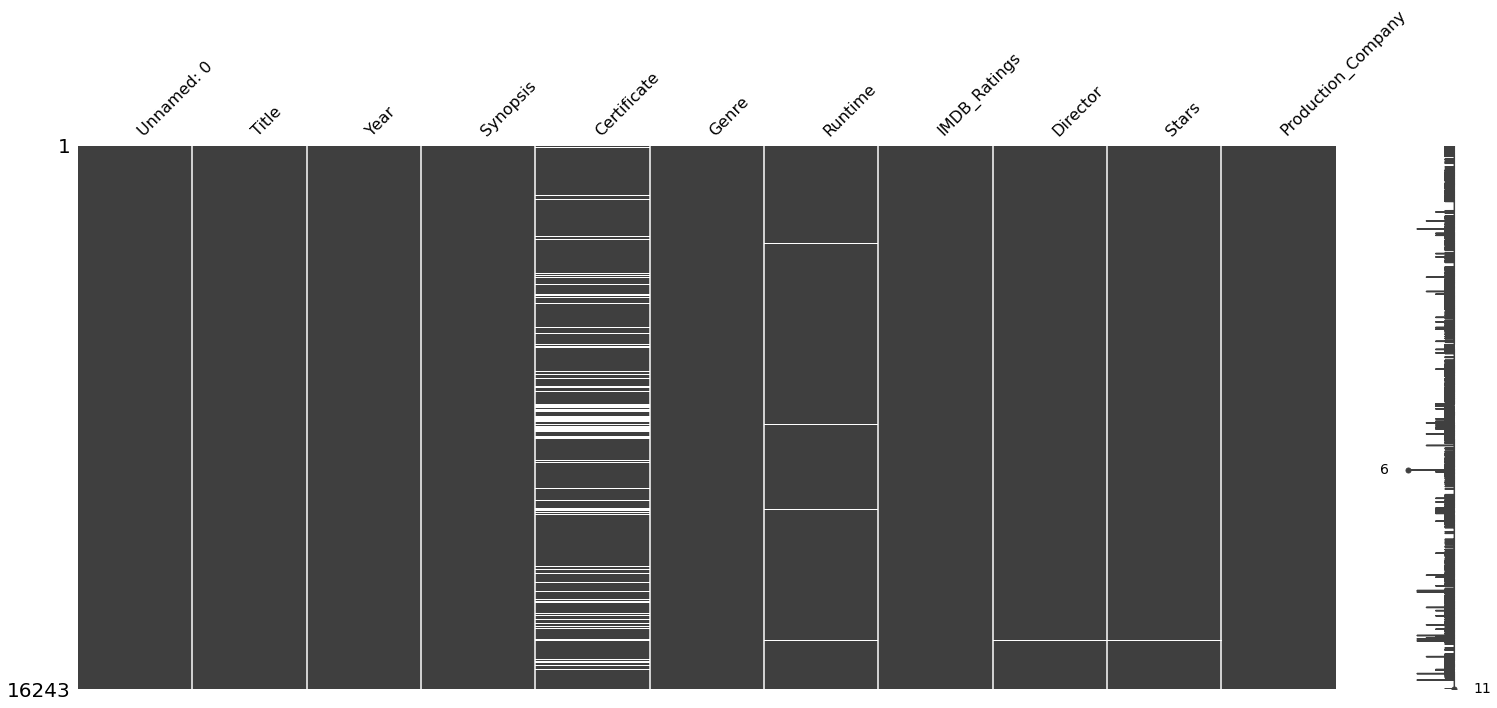

In [23]:
# Visualise missing values 
msno.matrix(movies)
plt.show()

In [16]:
# Define function for cleaning up the IMDB data.  
def clean_IMDB(df, Remove_col = 'name', Change_dtype = True, Remove_NA = True, Drop_duplicates = True):
    
    """
    Function to clean the data and remove unncessary information
    
    Args:
    param1 (pandas) - pandas dataframe 
    param2 (str) - column name to remove 
    param3 (bool) - True if to change the data type
    param4 - (bool)- True if to remove nan values based on subset columns
    param5 - (bool) - if True will remove duplicates
    
    Returns:
        returns clean pandas dataframe
    """
    
    # Remove column 
    df.drop(Remove_col, axis = 1, inplace = True)
    
    #Replace Non digits from Ratings
    df.replace({'Rat':np.nan}, inplace = True)
    
    # Remove NA
    if Remove_NA == True:
        df.dropna(subset = ['Runtime', 'Genre', 'Director', 'Stars'])
    
    #Remove additonal charecters from Year column
    df.Year = df.Year.str.replace('I', '')
    df.Year = df.Year.str.replace(')', '')
    df.Year = df.Year.str.replace('(', '')
    df.Year = df.Year.str.replace('V ', '')
    df.Year = df.Year.str.replace('X ', '')
    df.Director = df.Director.str.replace(':', '')
    
    #Change data type 
    if Change_dtype == True:
        
        col_title = ['Title','Director', 'Stars', 'Production_Company']
        for column in col_title:
            df[column] = df[column].str.strip().str.title()
            
    df['Production_Company'] = df['Production_Company'].astype('category')
    df['IMDB_Ratings'] = df.IMDB_Ratings.astype('float')
    df['Runtime'] = df.Runtime.str.strip('min').astype('float')
    df['Year'] = df.Year.astype('int')
    
    #Drop Duplicates
    if Drop_duplicates == True:
        columns = ['Title', 'Synopsis']
        for column in columns:
            df.drop_duplicates(subset = column, inplace = True)
            
    #Reset index
    df.reset_index(drop = True)
    
    return df


In [17]:
# clean up the dataset 
movies = clean_IMDB(movies, Remove_col = 'Unnamed: 0', Change_dtype = True, Remove_NA = True, Drop_duplicates = True)

#### 2.2 Clean up the Box Office Data

In [35]:
# Read the data to file 
box_office = pd.read_csv('box_office_data.csv', index_col = False)

In [36]:
box_office.sample(10)

,Unnamed: 0,Title,Box_Office_Sales
10629,293,Return to the Land of Wonders,"1,338"
42014,1630,Love Under the Rainbow,0
18631,895,End of Watch,"83,763,956"
19763,531,The Book of Esther,0
23460,1269,Four Blood Moons,0
11707,732,Arang,"5,428,407"
42414,2030,I Met a Girl,"53,244"
24364,2173,Wansei hui jia,"820,658"
7001,339,Jerry Springer: Ringmaster,"9,257,103"
35111,2680,Sembra mio figlio,"36,059"


In [37]:
box_office.shape

(45380, 3)

In [38]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45380 entries, 0 to 45379
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        45380 non-null  int64 
 1   Title             45380 non-null  object
 2   Box_Office_Sales  45380 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [39]:
box_office.columns

Index(['Unnamed: 0', 'Title', 'Box_Office_Sales'], dtype='object')

In [40]:
# Define function for cleaning up the box office data.  
def clean_box_office(df, Remove_col = 'name', Change_dtype = True):
    
    """
    Function to clean the data and remove unncessary information
    
    Args:
    
    param1 (pandas) - pandas dataframe 
    param2 (str) - column name to remove 
    param3 (bool) - True if to change the data type
    
    Returns:
    
        returns clean pandas dataframe
    """
    # Remove column 
    df.drop(Remove_col, axis = 1, inplace = True)
    
    # Replace 'None' values to nan
    df.replace({'None':np.nan}, inplace = True)
    
    #Change data type 
    if Change_dtype == True:
        
        df['Title'] = df['Title'].str.strip().str.title()
        df['Box_Office_Sales'] = df['Box_Office_Sales'].str.replace(',', '').astype('float')
    
    # Convert Currency - Dollar to Pound
    df['Box_Office_Sales'] = df['Box_Office_Sales'].apply(lambda x: x*0.71)
        
    #Reset index
    df.reset_index(drop = True)
    
    return df

In [42]:
box_office = clean_box_office(box_office, 'Unnamed: 0')

In [43]:
pd.set_option("display.precision", 8)

### 3. Data Exploration & Analysis

#### 3.1 Question 1 - What are the total number of movies released per year?  

In [18]:
grouped = movies.groupby('Year', dropna = False)['Title'].agg('count')

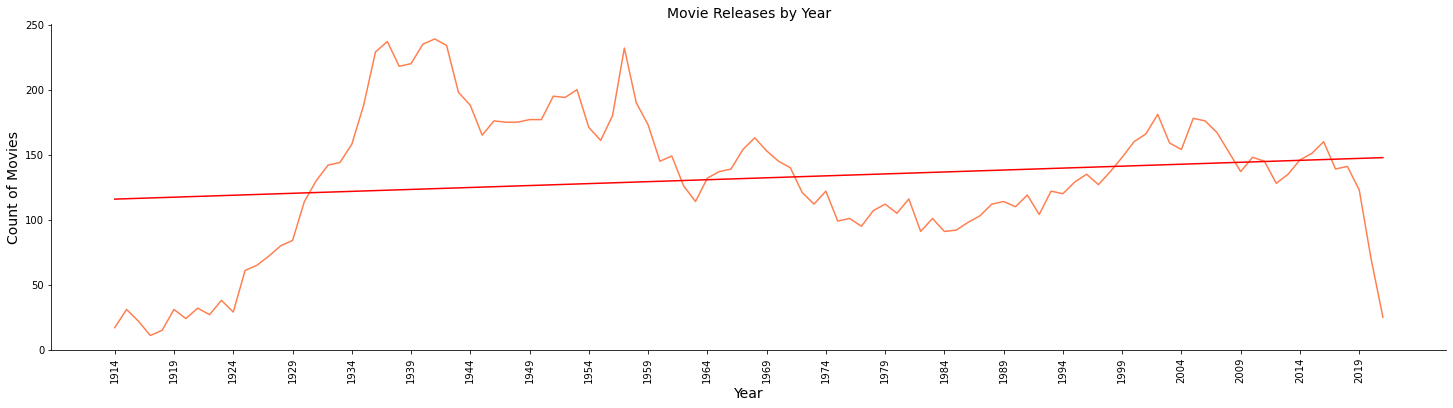

In [22]:
fig, ax = plt.subplots(figsize = (25,6))
grouped.plot.line(c = '#FF7F50')
ax.set_xlabel('Year',fontsize = '14')
ax.set_ylabel('Count of Movies',fontsize = '14')
ax.set_xticks(grouped.index[::5])
ax.set_xticklabels(grouped.index[::5],rotation=90)
ax.set_title('Movie Releases by Year',fontsize = '14')
z = np.polyfit(grouped.index, grouped.values, 1)
p = np.poly1d(z)
ax.plot(grouped.index, p(grouped.index) ,"r-")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Movie releases by year.png')

#### 3.2 Question 2 - How many movies did each production company release per year?, Whats the market share of each production company? 

In [248]:
# list of Production Company 
movies.Production_Company.unique()

['Fox', 'Sony', 'Dreamworks', 'Mgm', 'Paramount', 'Universal', 'Disney', 'Warner']
Categories (8, object): ['Fox', 'Sony', 'Dreamworks', 'Mgm', 'Paramount', 'Universal', 'Disney', 'Warner']

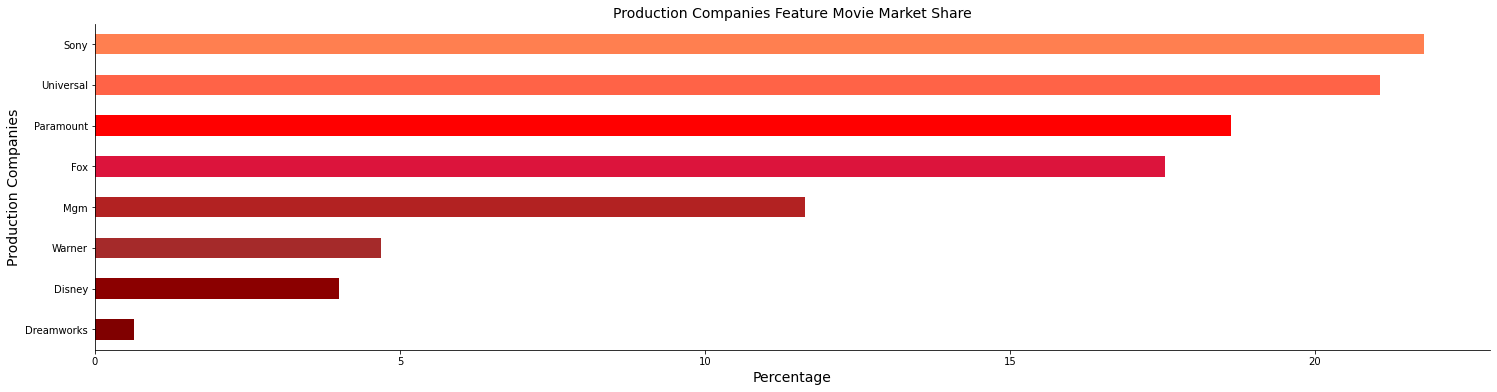

In [272]:
# Production Comapany Market Share as frac
fig, ax = plt.subplots(figsize = (25,6))
(movies.value_counts('Production_Company', normalize = True, ascending =True)*100).plot.barh(color = ['#800000', '#8B0000','#A52A2A', '#B22222','#DC143C', '#FF0000','#FF6347', '#FF7F50'])
ax.set_xlabel('Percentage',fontsize = '14')
ax.set_ylabel('Production Companies',fontsize = '14')
ax.set_title('Production Companies Feature Movie Market Share',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Production Companies market share.png')

In [75]:
# How many movies did each production company release per year?
Fox = movies.query('Production_Company == "Fox"').groupby('Year', dropna = False)['Title'].agg('count')
Sony= movies.query('Production_Company == "Sony"').groupby('Year', dropna = False)['Title'].agg('count')
Dreamworks= movies.query('Production_Company == "Dreamworks"').groupby('Year', dropna = False)['Title'].agg('count')
Mgm= movies.query('Production_Company == "Mgm"').groupby('Year', dropna = False)['Title'].agg('count')
Paramount= movies.query('Production_Company == "Paramount"').groupby('Year', dropna = False)['Title'].agg('count')
Universal= movies.query('Production_Company == "Universal"').groupby('Year', dropna = False)['Title'].agg('count')
Disney= movies.query('Production_Company == "Disney"').groupby('Year', dropna = False)['Title'].agg('count')
Warner= movies.query('Production_Company == "Warner"').groupby('Year', dropna = False)['Title'].agg('count')

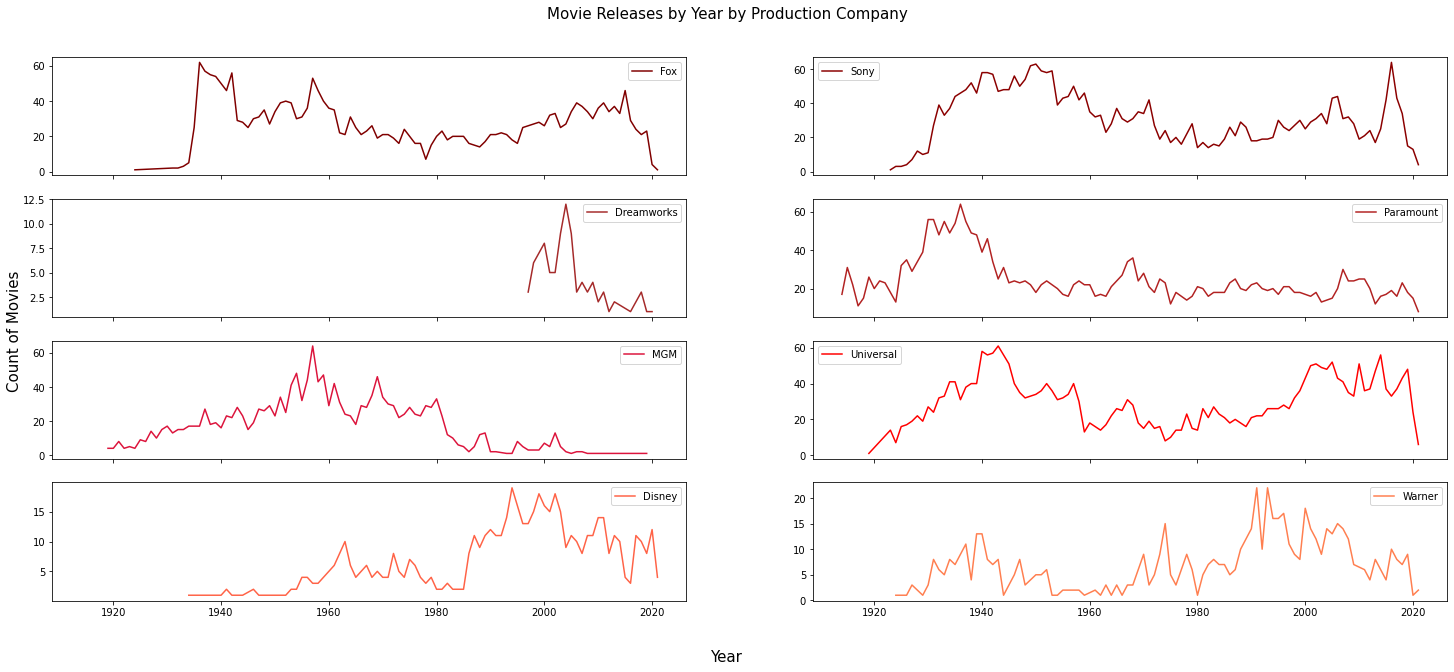

In [271]:
fig, ax = plt.subplots(4,2, figsize = (25,10), sharex = True)
ax[0,0].plot(Fox, c = '#800000', label = 'Fox')
ax[0,0].legend()
ax[0,1].plot(Sony, c = '#8B0000', label = 'Sony')
ax[0,1].legend()
ax[1,0].plot(Dreamworks, c = '#A52A2A', label = 'Dreamworks')
ax[1,0].legend()
ax[1,1].plot(Paramount, c = '#B22222', label = 'Paramount')
ax[1,1].legend()
ax[2,0].plot(Mgm, c = '#DC143C', label = 'MGM')
ax[2,0].legend()
ax[2,1].plot(Universal, c = '#FF0000', label = 'Universal')
ax[2,1].legend()
ax[3,0].plot(Disney, c = '#FF6347', label = 'Disney')
ax[3,0].legend()
ax[3,1].plot(Warner, c = '#FF7F50', label = 'Warner')
ax[3,1].legend()
fig.suptitle('Movie Releases by Year by Production Company', y = .95,fontsize = '15')
fig.text(0.5, 0.04, 'Year', ha='center', fontsize = '15')
fig.text(0.1, 0.5, 'Count of Movies', va='center', rotation='vertical', fontsize = '15')
plt.show()
fig.savefig('Movie releases by year by Production Company.png')

#### 3.3 Question 3 - What are the number of movies released by certificate type? 

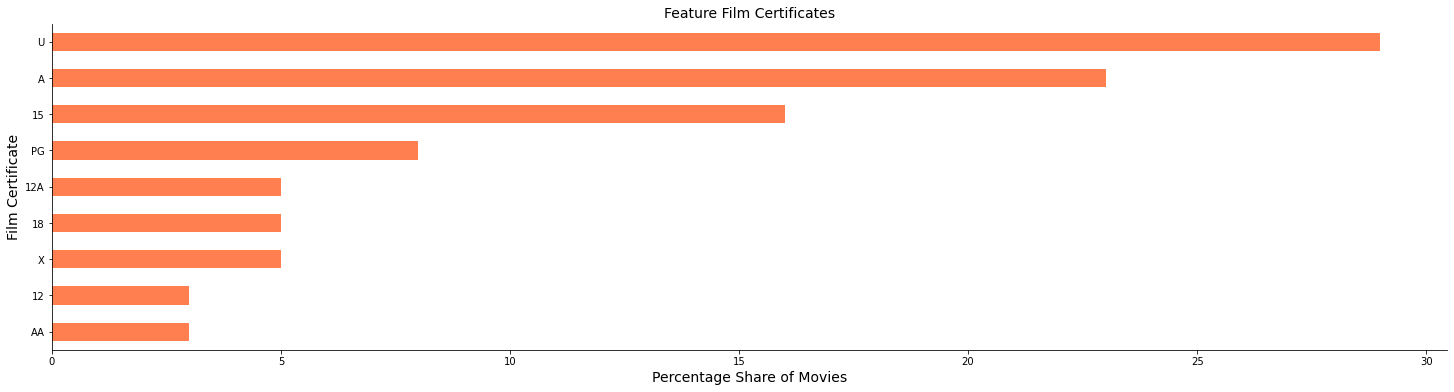

In [270]:
fig, ax = plt.subplots(figsize = (25,6))
certs = (movies.Certificate.value_counts(normalize = True, ascending = True).round(2))*100
certs[certs > 1.0].plot.barh(color = '#FF7F50')
ax.set_xlabel('Percentage Share of Movies',fontsize = '14')
ax.set_ylabel('Film Certificate',fontsize = '14')
ax.set_title('Feature Film Certificates',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Feature Film Certificates.png')

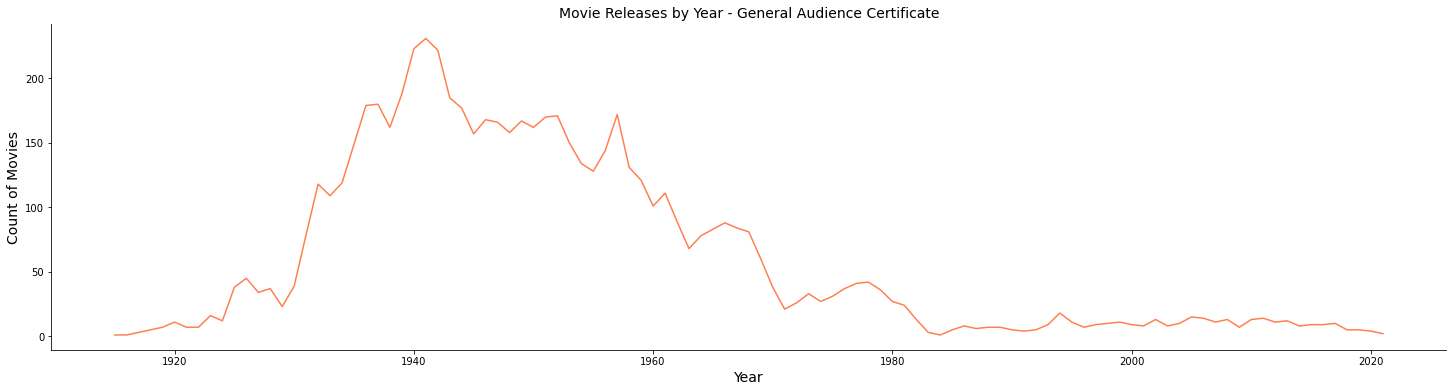

In [269]:
# since Certificate U & A account for 52% of the data and hence are the most popular.  lets see how these two ratings are trending across.  
fig, ax = plt.subplots(figsize = (25,6))
movies[movies.Certificate.isin(['A', 'U'])].groupby('Year')['Title'].agg('count').plot.line(c = '#FF7F50')
ax.set_xlabel('Year',fontsize = '14')
ax.set_ylabel('Count of Movies',fontsize = '14')
ax.set_title('Movie Releases by Year - General Audience Certificate',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Movie releases by year - General Audience Certificate.png')

#### 3.4 Question 4 - What the most popular genres and which genre of movies is in decline? 

In [105]:
genre = (movies.Genre.value_counts(normalize = True)*100).round(2)

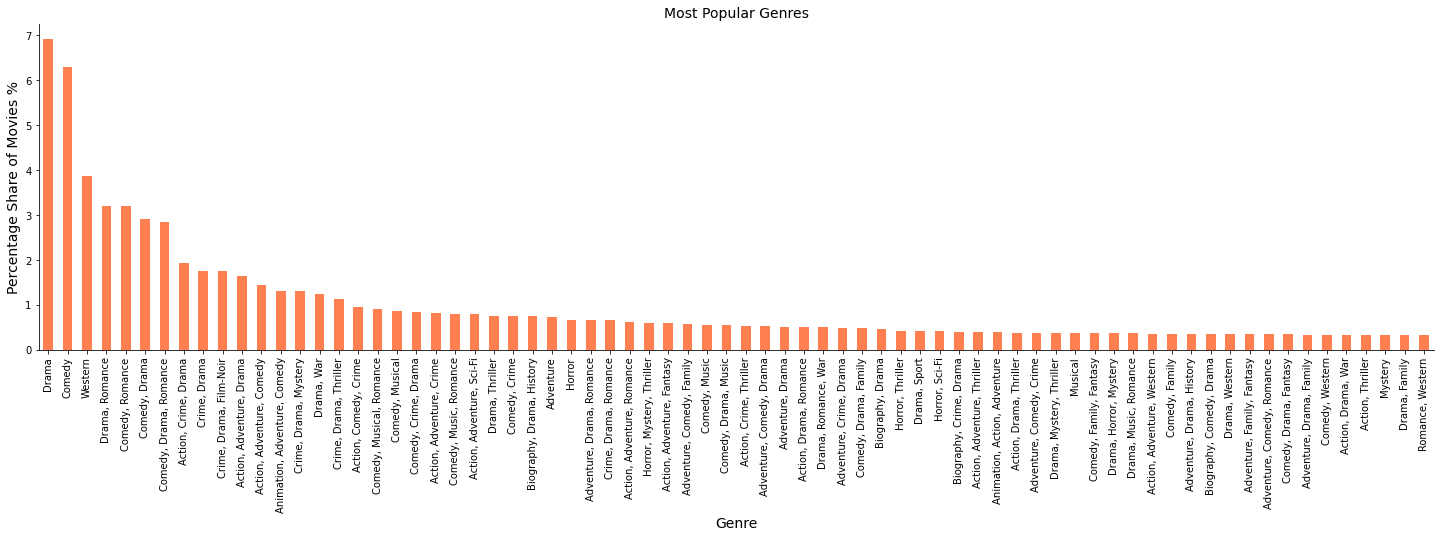

In [268]:
# Most Popular Genre or Category of Genre continiously 
fig, ax = plt.subplots(figsize = (25,6))
genre[genre > 0.3].plot.bar(color = '#FF7F50')
ax.set_ylabel('Percentage Share of Movies %',fontsize = '14')
ax.set_xlabel('Genre',fontsize = '14')
ax.set_title('Most Popular Genres',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Most popular movie genres.png')

In [109]:
genre[genre == 0.01].head(50) # all of these categories have 140 movies released and account for exactly  0.01% 

Animation, Comedy               0.01
Fantasy, Romance                0.01
Music, Romance, War             0.01
Adventure, Sci-Fi, Thriller     0.01
Action, Crime, Fantasy          0.01
Action, Romance, Thriller       0.01
Drama, Film-Noir, Music         0.01
Family, Comedy, Drama           0.01
Adventure, Mystery, Sci-Fi      0.01
Romance, War, Western           0.01
Biography, Drama, Western       0.01
Action, Sci-Fi, Sport           0.01
Comedy, Mystery, Sci-Fi         0.01
Family, Musical, Romance        0.01
Film-Noir, Mystery, Romance     0.01
Comedy, Music, Mystery          0.01
Musical, Drama                  0.01
Drama, Mystery, War             0.01
Action, Fantasy, Thriller       0.01
Action, Biography, Western      0.01
Adventure, Family, Musical      0.01
Adventure, Crime, Western       0.01
Crime, Horror, Romance          0.01
Drama, Fantasy, Thriller        0.01
Mystery, Sci-Fi                 0.01
History, Music, Romance         0.01
Biography                       0.01
C

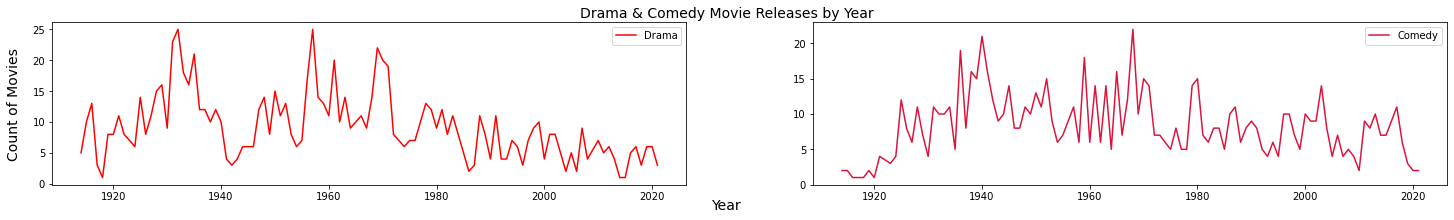

In [266]:
# Lets see how the two major movie genres are trending over the years
drama = movies[movies.Genre == 'Drama'].groupby('Year')['Title'].agg('count')
comedy = movies[movies.Genre == 'Comedy'].groupby('Year')['Title'].agg('count')
fig, ax = plt.subplots(1,2, figsize = (25,3), sharex = True)
ax[0].plot(drama, c = '#FF0000', label = 'Drama')
ax[0].legend()
ax[1].plot(comedy, c = '#DC143C', label = 'Comedy')
ax[1].legend()
fig.suptitle('Drama & Comedy Movie Releases by Year', y = .95,fontsize = '14')
fig.text(0.5, 0.01, 'Year', ha='center', fontsize = '14')
fig.text(0.1, 0.5, 'Count of Movies', va='center', rotation='vertical', fontsize = '14')
plt.show()

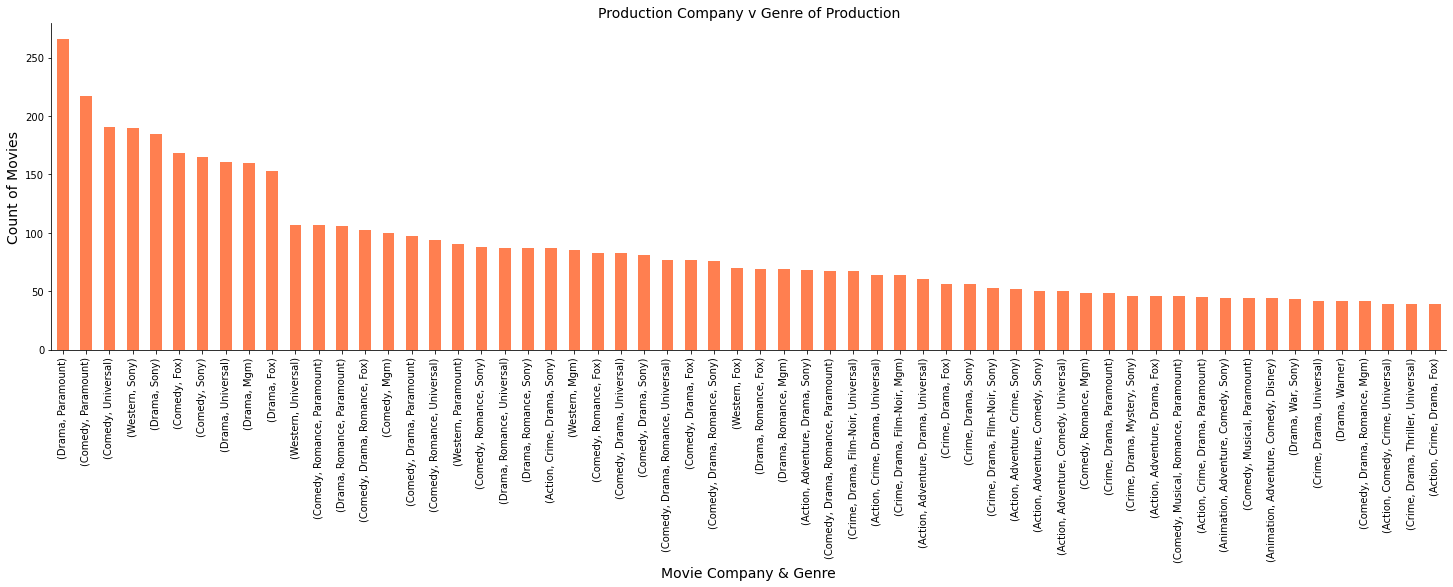

In [418]:
# Which company are leading which genre of movie? 
fig, ax = plt.subplots(figsize = (25,6))
movies[['Genre', 'Production_Company']].value_counts().nlargest(60).plot.bar(color = '#FF7F50')
ax.set_ylabel('Count of Movies',fontsize = '14')
ax.set_xlabel('Movie Company & Genre',fontsize = '14')
ax.set_title('Production Company v Genre of Production',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Production Company v Genre.png')

Paramount is currently leading on both Daram and Comedy productions. 

#### 3.5 Question 5 - What are the avarege movie ratings on IMDB?, Which genres are rated the highest? which production company's movie is rated the highest? 

In [253]:
print('Average IMDB Ratings for feature film is: {}'.format(np.round(movies.IMDB_Ratings.mean(),2)))
print('Median IMDB Ratings for feature film is: {}'.format(np.round(movies.IMDB_Ratings.median(),2)))

Average IMDB Ratings for feature film is: 6.29
Median IMDB Ratings for feature film is: 6.4


In [247]:
print(f'Best Rated Feature Movie is: {movies[movies.IMDB_Ratings == 9.3].Title.values[0]}, Rated: {movies.IMDB_Ratings.max()}')

Best Rated Feature Movie is: The Shawshank Redemption, Rated: 9.3


In [248]:
print(f'Worst Rated Feature Movie is: {movies[movies.IMDB_Ratings == 1.0].Title.values[0]}, Rated: {movies.IMDB_Ratings.min()}')

Worst Rated Feature Movie is: An Adventure In Hearts, Rated: 1.0


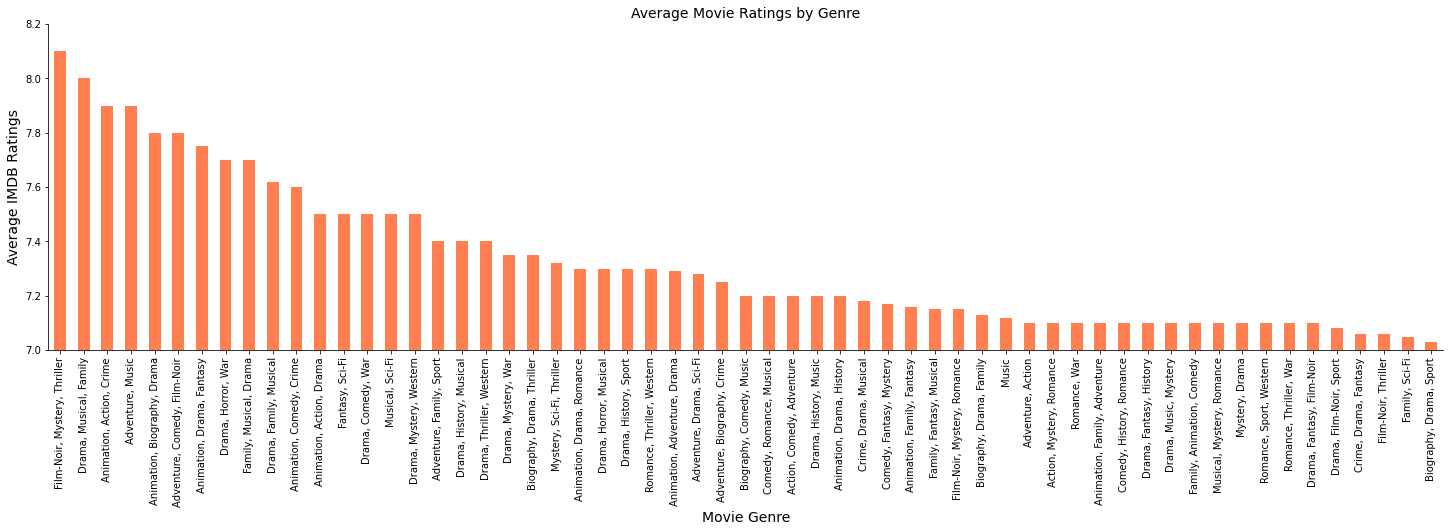

In [264]:
# Average movie Ratings by Genre
r_by_genre = movies.groupby('Genre')['IMDB_Ratings'].mean().round(2)[movies.groupby('Genre')['IMDB_Ratings'].mean().round(2)>7].sort_values(ascending =False)
fig, ax = plt.subplots(figsize = (25,6))
r_by_genre.plot.bar(color = '#FF7F50')
ax.set_ylabel('Average IMDB Ratings',fontsize = '14')
ax.set_xlabel('Movie Genre',fontsize = '14')
ax.set_title('Average Movie Ratings by Genre',fontsize = '14')
ax.set_ylim(7,8.20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Average movie ratings by Genre.png')

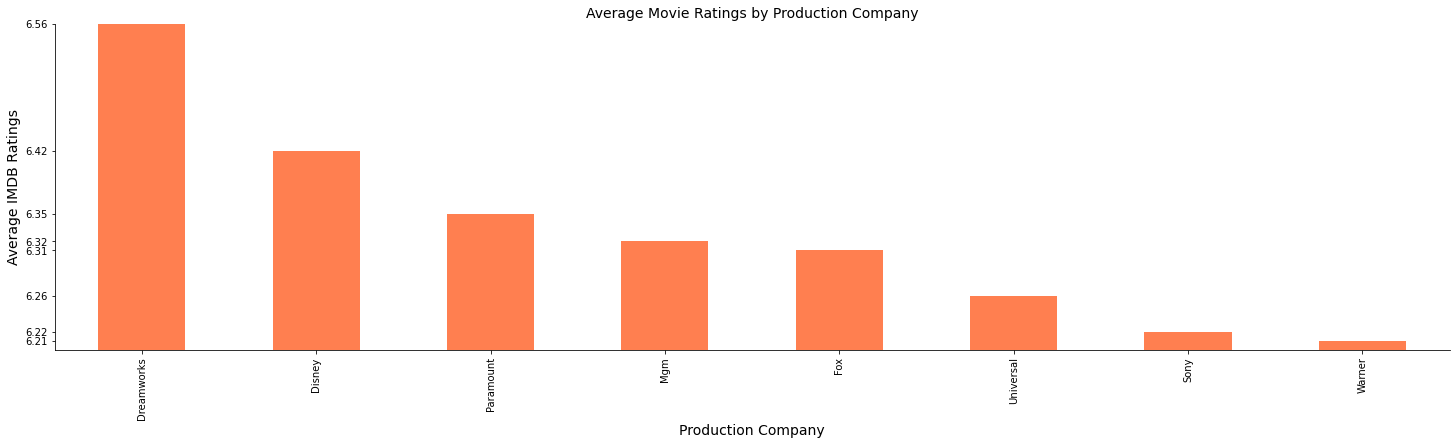

In [263]:
# Average movie ratings by Production Company
r_by_prod = movies.groupby('Production_Company')['IMDB_Ratings'].mean().round(2).sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (25,6))
r_by_prod.plot.bar(color = '#FF7F50')
ax.set_ylabel('Average IMDB Ratings',fontsize = '14')
ax.set_xlabel('Production Company',fontsize = '14')
ax.set_title('Average Movie Ratings by Production Company',fontsize = '14')
ax.set_ylim(6.2,6.4)
ax.set_yticks(r_by_prod.values)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Average movie ratings by production Company.png')

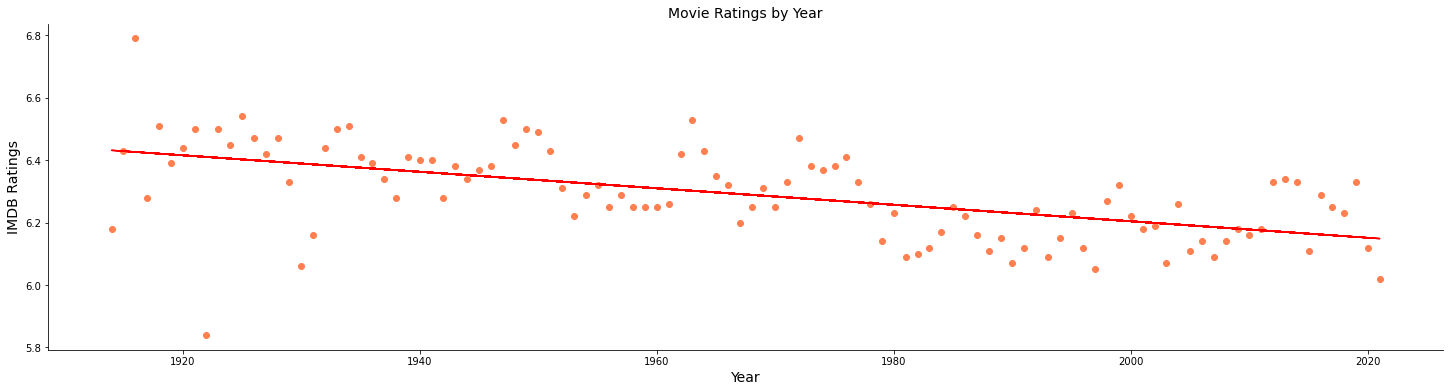

In [262]:
#Average Movie Ratings by Year
r_by_year = movies.groupby('Year')['IMDB_Ratings'].mean().round(2).sort_values(ascending =False)
fig, ax = plt.subplots(figsize = (25,6))
ax.scatter(x= r_by_year.index, y = r_by_year.values, c = '#FF7F50')
ax.set_xlabel('Year',fontsize = '14')
ax.set_ylabel('IMDB Ratings',fontsize = '14')
ax.set_title('Movie Ratings by Year', fontsize = '14')
z = np.polyfit(r_by_year.index, r_by_year.values, 1)
p = np.poly1d(z)
ax.plot(r_by_year.index, p(r_by_year.index) ,"r-")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Movie ratings by Year.png')

#### 3.6 Question 6 - What are the avarege movie runtimes on IMDB?, Which genres have the longest runtime? which production company produces the longest movies and do ratings impact the movie runtime?

In [276]:
print('Average IMDB runtime for feature film is: {} minutes'.format(np.round(movies.Runtime.mean(),0)))
print('Median IMDB runtime for feature film is: {} minutes'.format(np.round(movies.Runtime.median(),0)))

Average IMDB runtime for feature film is: 95.0 minutes
Median IMDB runtime for feature film is: 93.0 minutes


In [290]:
print(f'Longest Feature Movie is: {movies[movies.Runtime == 359.00].Title.values[0]}, Rated: {movies.Runtime.max()}')

Longest Feature Movie is: Barricade (Les Miserables Part II), Rated: 359.0


In [295]:
print(f'Shortest Feature Movie is: {movies[movies.Runtime== 45.0].Title.values[0]}, Rated: {movies.Runtime.min()}')

Shortest Feature Movie is: Alpha And Omega 4: The Legend Of The Saw Toothed Cave, Rated: 45.0


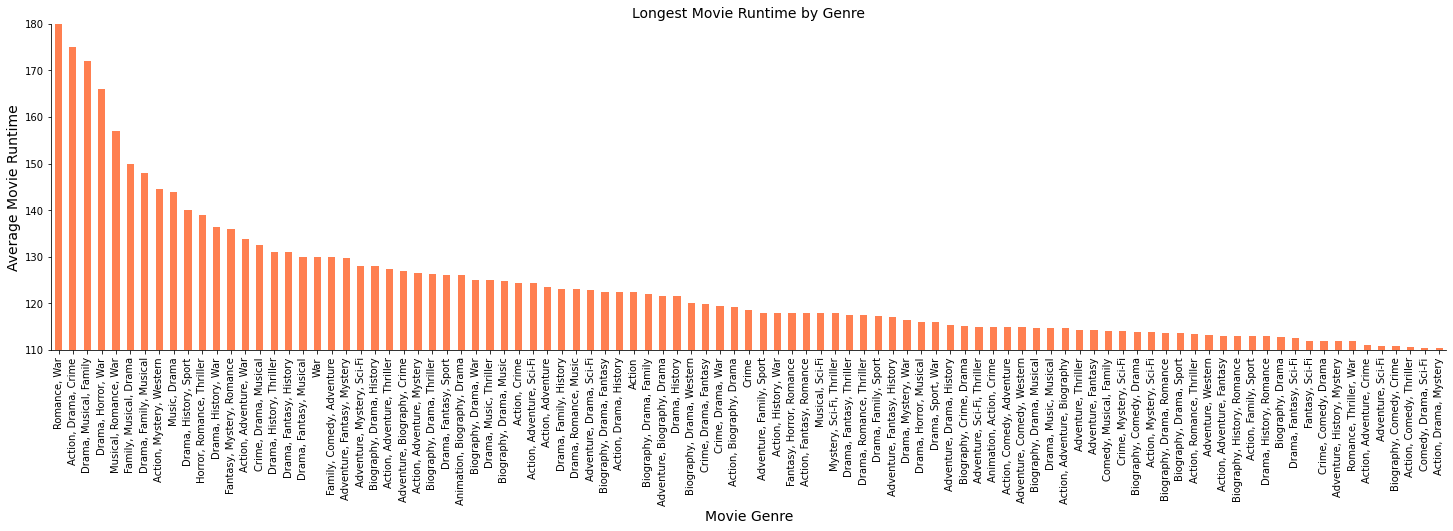

In [367]:
# Longest Movie by Genre
runtime_by_genre = movies.groupby('Genre')['Runtime'].mean().round(2)[movies.groupby('Genre')['Runtime'].mean().round(2)>110].sort_values(ascending =False)
fig, ax = plt.subplots(figsize = (25,6))
runtime_by_genre.plot.bar(color = '#FF7F50')
ax.set_ylabel('Average Movie Runtime',fontsize = '14')
ax.set_xlabel('Movie Genre',fontsize = '14')
ax.set_title('Longest Movie Runtime by Genre',fontsize = '14')
ax.set_ylim(110,180)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Longest movie runtime by Genre.png')

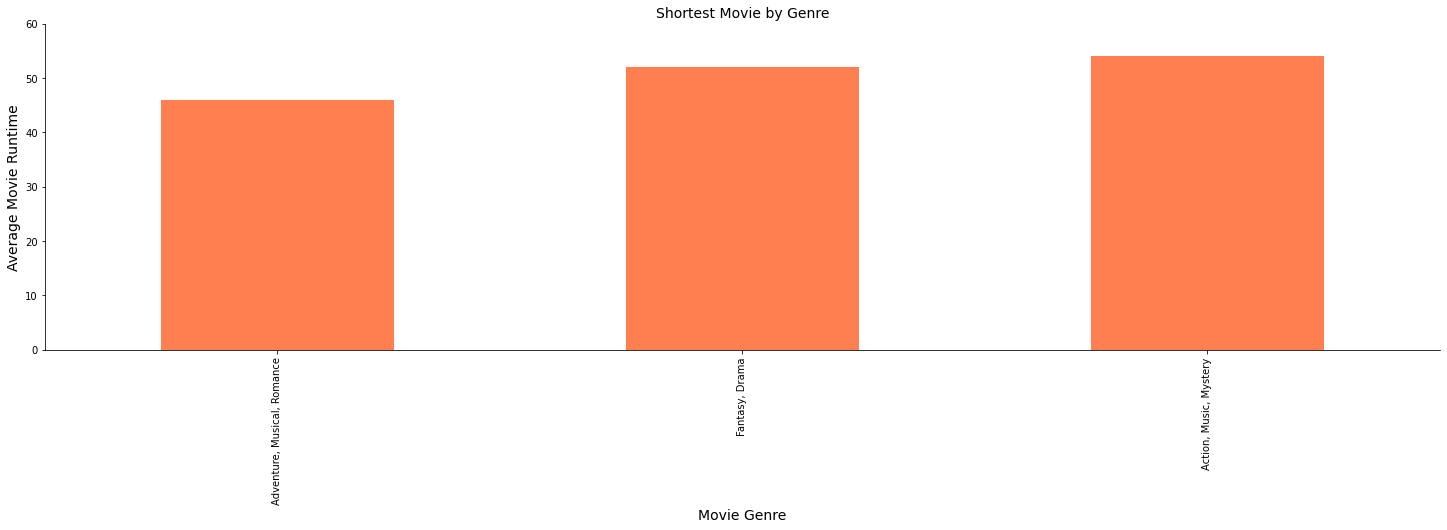

In [322]:
#Shortest Movie by Genre
runtime_by_genre = movies.groupby('Genre')['Runtime'].mean().round(2)[movies.groupby('Genre')['Runtime'].mean().round(2)<55].sort_values(ascending =True)
fig, ax = plt.subplots(figsize = (25,6))
runtime_by_genre.plot.bar(color = '#FF7F50')
ax.set_ylabel('Average Movie Runtime in Minutes',fontsize = '14')
ax.set_xlabel('Movie Genre',fontsize = '14')
ax.set_title('Shortest Movie by Genre',fontsize = '14')
ax.set_ylim(0,60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Shortest movie runtime by Genre.png')

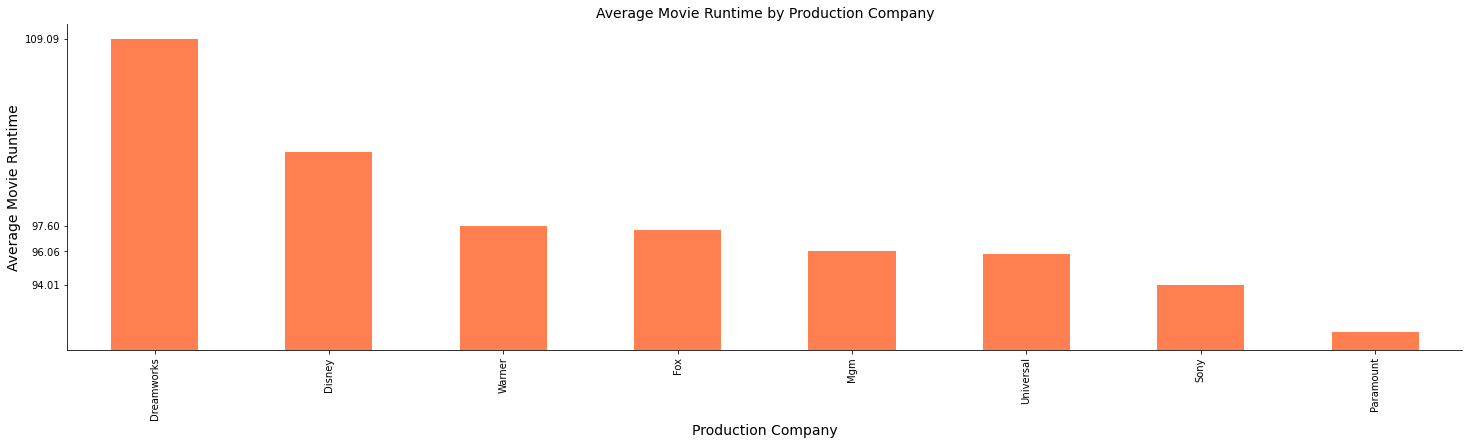

In [334]:
# Average Movie runtime by Production Company
runtime_by_prod = movies.groupby('Production_Company')['Runtime'].mean().round(2).sort_values(ascending = False)
fig, ax = plt.subplots(figsize = (25,6))
runtime_by_prod.plot.bar(color = '#FF7F50')
ax.set_ylabel('Average Movie Runtime in Minutes',fontsize = '14')
ax.set_xlabel('Production Company',fontsize = '14')
ax.set_title('Average Movie Runtime by Production Company',fontsize = '14')
ax.set_ylim(90,110)
ax.set_yticks(runtime_by_prod.values[::2])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Average movie runtime by production Company.png')

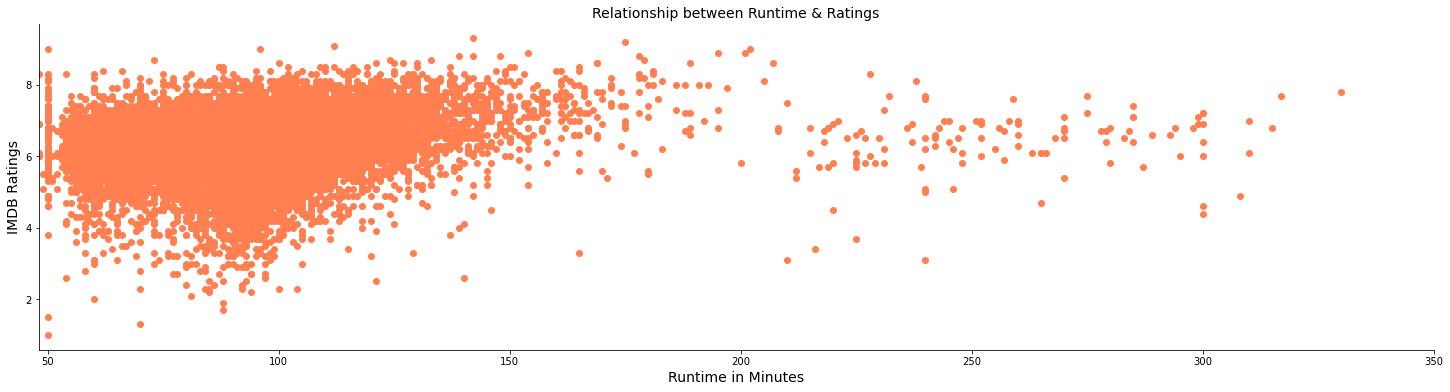

In [365]:
#Relationship between Runtime and Ratings
impact = movies.dropna(subset = ['IMDB_Ratings', 'Runtime'], how = 'any')[['IMDB_Ratings', 'Runtime']].sort_values(by = ['IMDB_Ratings', 'Runtime'], ascending = False)
fig, ax = plt.subplots(figsize = (25,6))
ax.scatter(impact.Runtime, impact.IMDB_Ratings, color = '#FF7F50')
ax.set_ylabel('IMDB Ratings',fontsize = '14')
ax.set_xlabel('Runtime in Minutes',fontsize = '14')
ax.set_title('Relationship between Runtime & Ratings',fontsize = '14')
ax.set_xlim(48,350)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Impact of Runtime on Ratings.png')

In [23]:
# Looking at these data, movies what are of historic content such as war, dramas possibly based on true stories tend to be longer while adventure, romance, fantasy and action tend to be shorter.  Dreamworks tends to do long movies while paramount seems to be the opposite. in terms of impact on ratings, movies between 90 to 100 minutes long tend to receive the highest reviews particuarly if they are of action, thriler, comedy based.    

#### 3.7 Question 7 - Who are the leading directors in the film industry?

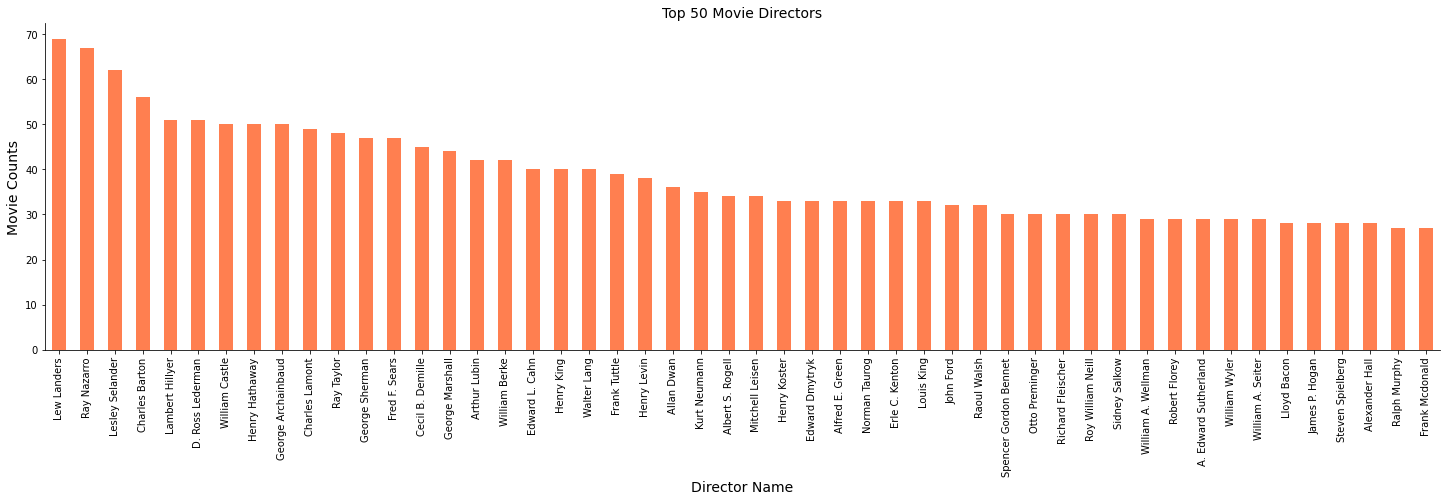

In [388]:
#Top 50 Directors on movie counts
fig, ax = plt.subplots(figsize = (25,6))
movies[movies.Director.notnull()].Director.value_counts().nlargest(50).plot.bar(color = '#FF7F50')
ax.set_ylabel('Movie Counts',fontsize = '14')
ax.set_xlabel('Director Name',fontsize = '14')
ax.set_title('Top 50 Movie Directors',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()

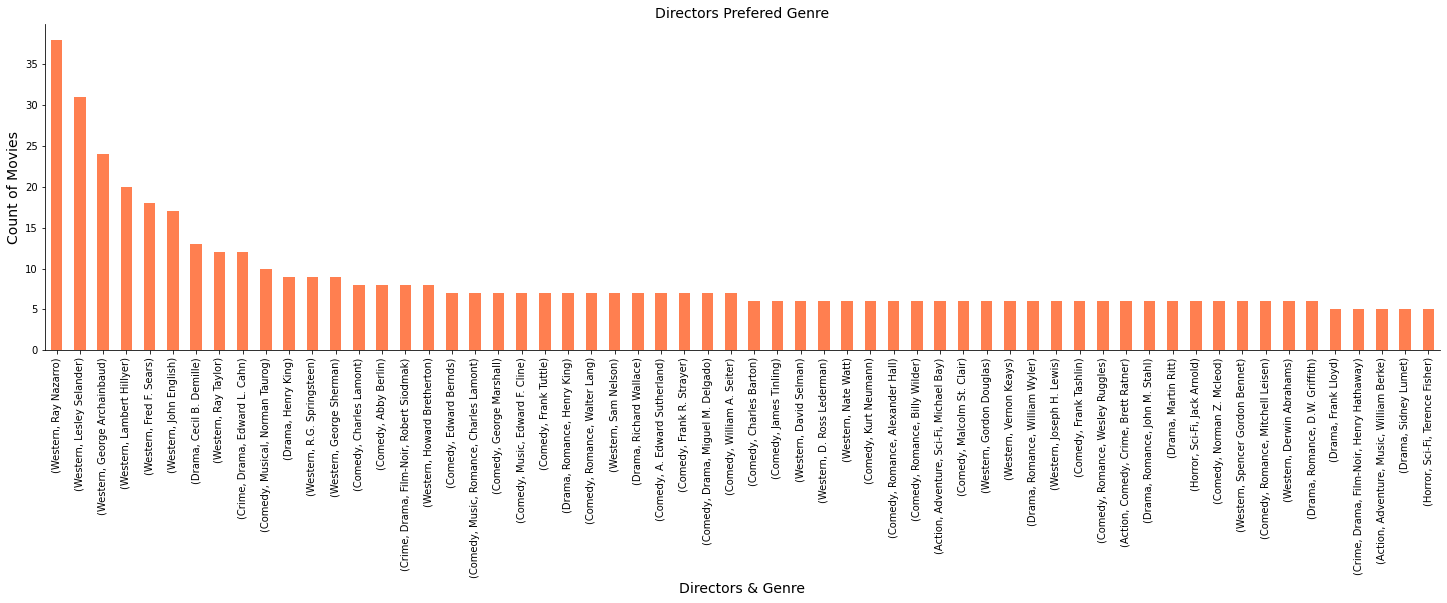

In [417]:
# Directors prefered movie genre
fig, ax = plt.subplots(figsize = (25,6))
movies[['Genre', 'Director']].value_counts().nlargest(60).plot.bar(color = '#FF7F50')
ax.set_ylabel('Count of Movies',fontsize = '14')
ax.set_xlabel('Directors & Genre',fontsize = '14')
ax.set_title('Directors Prefered Genre',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Directors Prefered Genre.png')

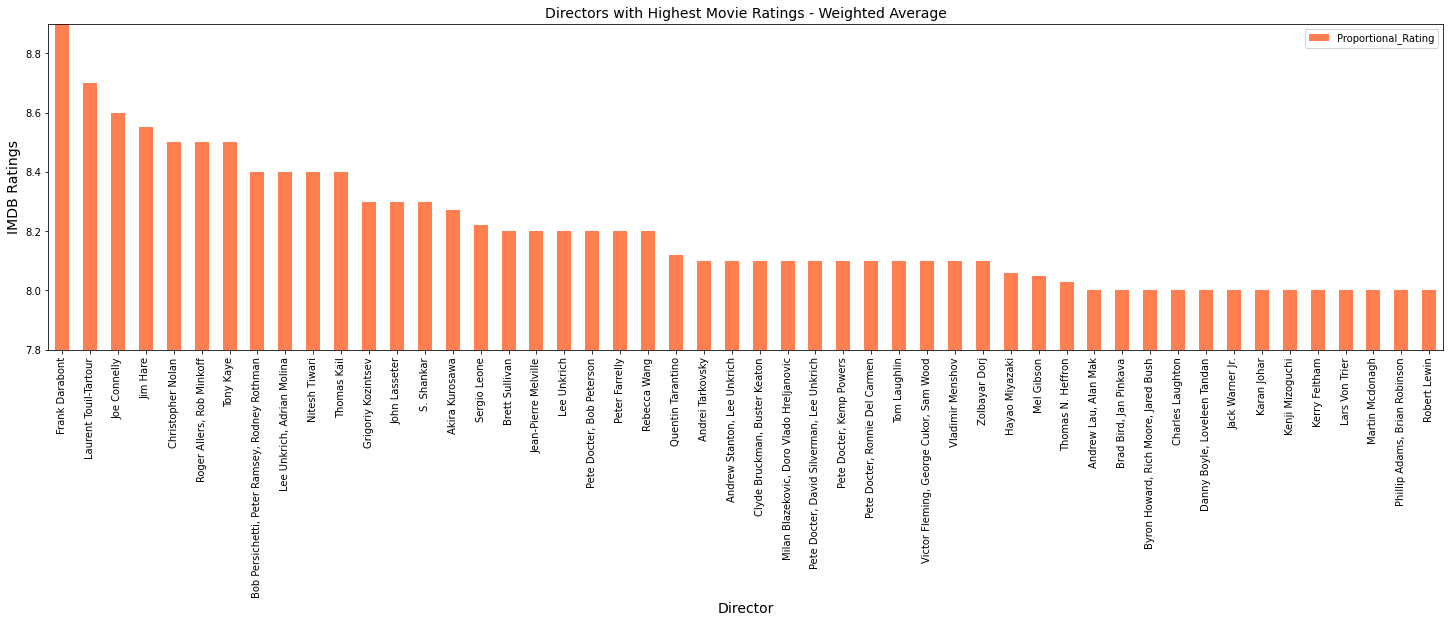

In [519]:
# Top 50 Directors with the highest movie ratings (Proportional to their number of movies)
dir_rating = pd.DataFrame(movies.groupby('Director')['Title','IMDB_Ratings'].agg({'Title':'count', 'IMDB_Ratings':np.sum}))
dir_rating['Proportional_Rating'] = (dir_rating.IMDB_Ratings / dir_rating.Title).round(2)
dir_rating = dir_rating.nlargest(50,columns = 'Proportional_Rating').drop(['Title', 'IMDB_Ratings'],axis = 1)
dir_rating.plot.bar(color = '#FF7F50')
plt.title('Directors with Highest Movie Ratings - Weighted Average', fontsize = '14')
plt.xlabel('Director', fontsize = '14')
plt.ylabel('IMDB Ratings', fontsize = '14')
plt.ylim(7.8, 8.9)
plt.show()
fig.savefig('Top 50 Directors with highest ratings.png')

#### 3.8 Question 8 - Whats the highest grossing movies all time?  

In [527]:
#Join the box office data with the movies data
movies_box_office = movies.merge(box_office, how = 'inner')
movies_box_office.to_csv('movies_box_office.csv')

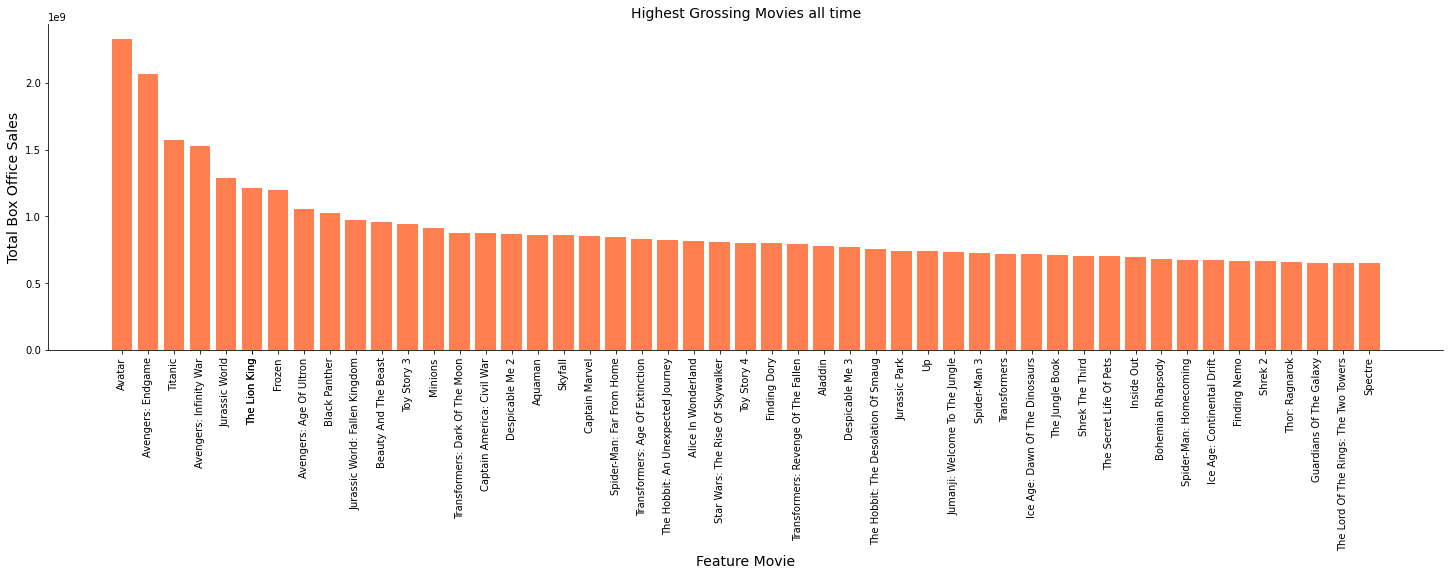

In [561]:
#Top 50 highest grossing movies all time 
high_gross = movies_box_office[['Title', 'Box_Office_Sales']].sort_values('Box_Office_Sales',ascending =False).set_index('Title', drop= True).head(50)
fig, ax = plt.subplots(figsize = (25,6))
ax.bar(high_gross.index, high_gross.Box_Office_Sales, color = '#FF7F50')
ax.set_xticks(high_gross.index)
ax.set_xticklabels(high_gross.index, rotation=90)
ax.set_ylabel('Total Box Office Sales',fontsize = '14')
ax.set_xlabel('Feature Movie',fontsize = '14')
ax.set_title('Highest Grossing Movies all time',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Top 50 Highest grossing movies all time.png')

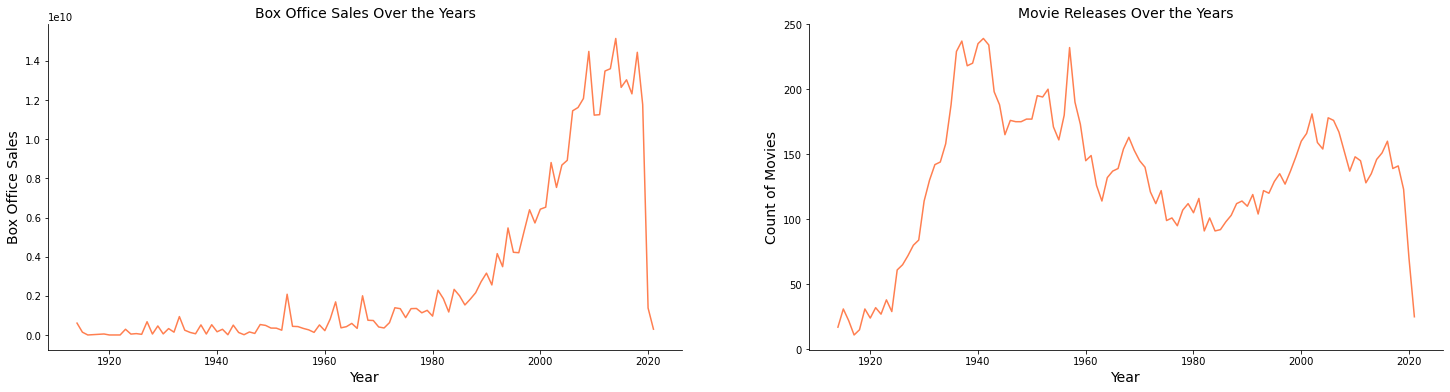

In [586]:
# Box Office Sales over the years v number of movies
fig, ax = plt.subplots(1,2,figsize = (25,6), sharex = True)
ax[0].plot(movies_box_office.groupby('Year')['Box_Office_Sales'].sum().index, movies_box_office.groupby('Year')['Box_Office_Sales'].sum().values,color = '#FF7F50')
ax[1].plot(movies.groupby('Year')['Title'].count().index, movies.groupby('Year')['Title'].count().values,color = '#FF7F50')
ax[0].set_ylabel('Box Office Sales',fontsize = '14')
ax[0].set_xlabel('Year',fontsize = '14')
ax[0].set_title('Box Office Sales Over the Years',fontsize = '14')
ax[1].set_ylabel('Count of Movies',fontsize = '14')
ax[1].set_xlabel('Year',fontsize = '14')
ax[1].set_title('Movie Releases Over the Years',fontsize = '14')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(True)
ax[0].spines['left'].set_visible(True)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].spines['left'].set_visible(True)
plt.show()
fig.savefig('Box Office Sales v Count of Releases over the years.png')

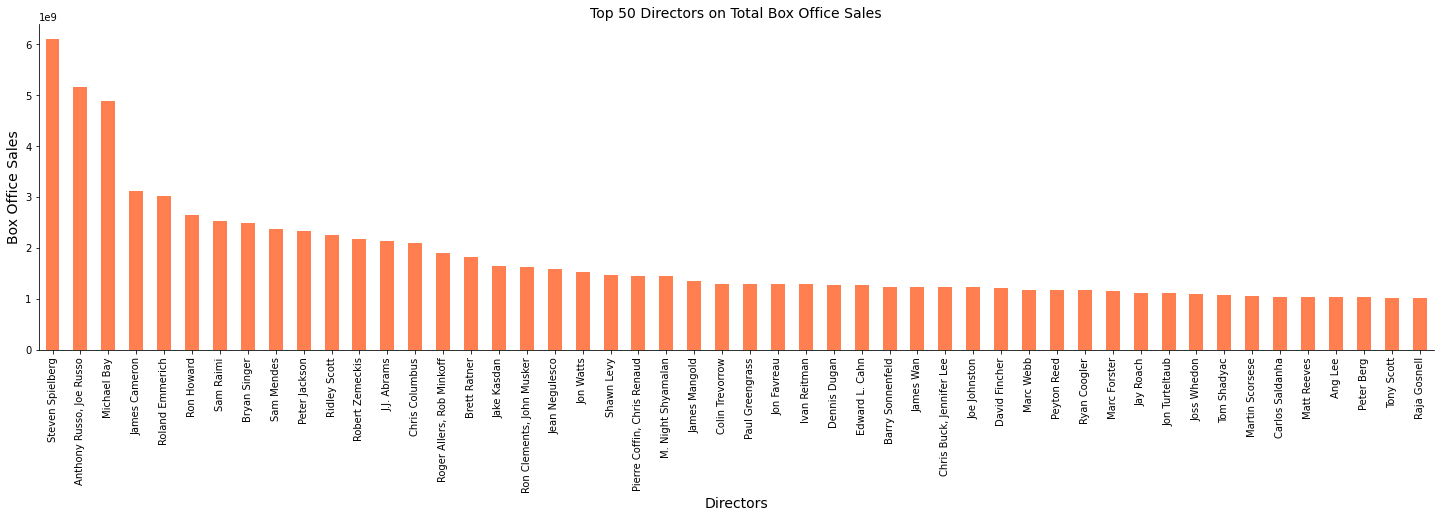

In [597]:
fig, ax = plt.subplots(figsize = (25,6))
movies_box_office.groupby('Director')['Box_Office_Sales'].sum().sort_values(ascending = False).head(50).plot.bar(color = '#FF7F50')
ax.set_ylabel('Box Office Sales',fontsize = '14')
ax.set_xlabel('Directors',fontsize = '14')
ax.set_title('Top 50 Directors on Total Box Office Sales',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.show()
fig.savefig('Highest Grossing Directors.png')

In [611]:
stars = movies_box_office[['Stars', 'Box_Office_Sales']]
stars['Star0'] = stars.Stars.str.split(',', expand = True)[0]
stars['Star1'] = stars.Stars.str.split(',', expand = True)[1]
stars['Star2'] = stars.Stars.str.split(',', expand = True)[2]
stars['Star3'] = stars.Stars.str.split(',', expand = True)[3]
stars.drop('Stars', axis = 1, inplace = True)

<ipython-input-611-b1ae2a518697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars['Star0'] = stars.Stars.str.split(',', expand = True)[0]
<ipython-input-611-b1ae2a518697>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars['Star1'] = stars.Stars.str.split(',', expand = True)[1]
<ipython-input-611-b1ae2a518697>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

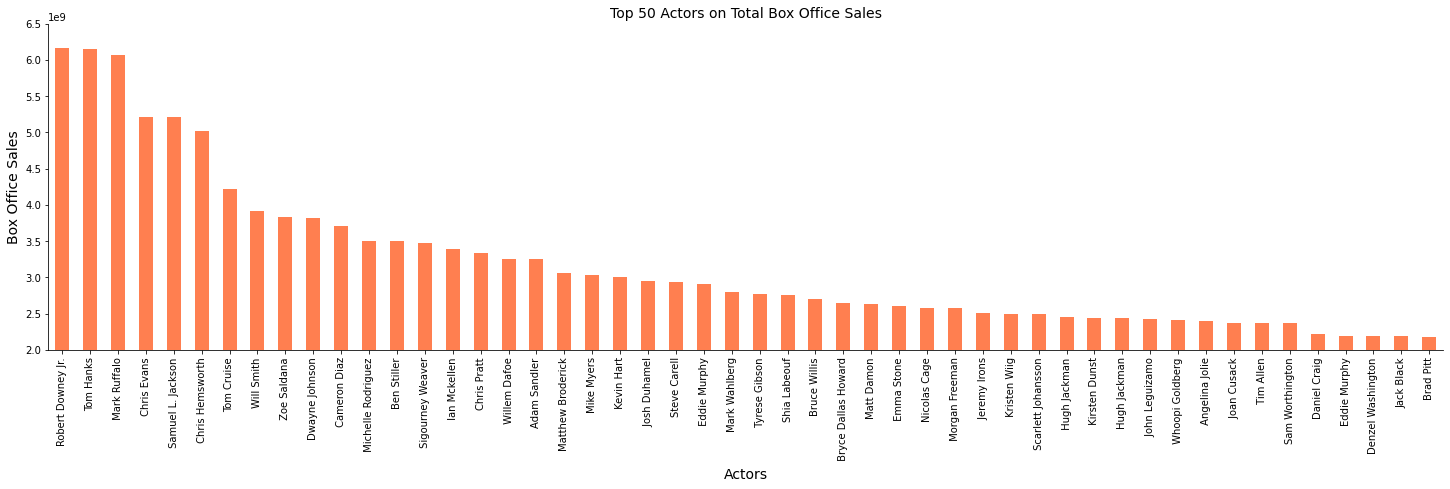

In [640]:
fig, ax = plt.subplots(figsize = (25,6))
stars.melt(id_vars = 'Box_Office_Sales',var_name = 'Stars').drop('Stars', axis = 1)[['value', 'Box_Office_Sales']].rename(columns = {'value':'Actors'}).groupby('Actors')['Box_Office_Sales'].sum().sort_values(ascending = False).head(50).plot.bar(color = '#FF7F50')
ax.set_ylabel('Box Office Sales',fontsize = '14')
ax.set_xlabel('Actors',fontsize = '14')
ax.set_title('Top 50 Actors on Total Box Office Sales',fontsize = '14')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_ylim(2000000000, 6500000000)
plt.show()
fig.savefig('Highest Grossing Actors.png')

### 4. Conclusion

its evident from this data that that Feature Films are in serious decline and have been for some time since the emergence of internet around 2000 as shown in section 3.1.  Major film production companies worldwide such as MGM, 20th Century Fox and Paramount have been producing less feature films year on year since 2005, perhaps no surprise the Netflix streaming app has properly launched worldwide around the same time. Sony seems to still be keeping up the production although it has been effected by the pandemic as well as everyone. What seems to be alarming is that the ticket price of a movie has surged well above inflation as shown in section 3.8 while the average movie rating per year has gone down (the highest seems to be around teh 60s). perhaps this can be explained the surge in the cost of movie production and investment into the cinemas and exhibition places however that does very little of the quality of the movies. 

My take away from this is that Feature Films will certainly continue to decline and major chain cinemas will soon come to and end. However local cinemas, nostalga experience and experiential cinemas will take their place. As far as movies concerned, there will certainly be a focus on streaming services producing their own one off featre films to their audiences and some of the upcoming major feature films will certainly be exhibited via streaming services.

### 5.References

1. 'https://www.independent.co.uk/arts-entertainment/films/news/cinema-closed-uk-cineworld-odeon-picturehouse-b884463.html'
2.'https://en.wikipedia.org/wiki/Feature_film'
3. 'https://www2.bfi.org.uk/sites/bfi.org.uk/files/downloads/bfi-uk-film-economy-2019-01-30.pdf'
4. 'https://www.imdb.com/search/title/?title_type=feature&user_rating=1.0,10.0&companies=fox&sort=year,asc&count=250'
5. 'https://www.the-numbers.com/movies/year/1950'